### Features Selection Technique in Machine Learning

Normally feature selection techniques are classfied into two categories, supervised and unsupervised based on whether they use labelled data or unlabelled data.

From a taxonomic point of view, these techniques are classified as under:

    A. Filter methods
    B. Wrapper methods
    C. Embedded/Intrinsicm methods
    D. Hybrid methods

Filter methods:
- uses intrinsic properties of the features measured via univariate statistics instead of cross-validation performance.
- faster and less computationally expensive than wrapper methods

SOME FILTER METHODS:
- Chi-square test
- Correlation Coefficient (with heatmap)
- Dispersion Ratio
- Fisher’s Score
- Information Gain
- Mean Absolute Difference (MAD)
- Mutual Dependence
- Relief
- Variance Threshold

Some of Wrapper Methods are:
- Forward selection 
- Backward elimination
- Bi-directional elimination
- Exhaustive Feature Selection
- Recursive Feature Elimination
- Recursive Feature Elimination with Cross-Validation

Some of Embedded Methods:
- LASSO Regularization (L1)
- Ridge regularization
- Tree based methods (Random Forest Importance)

### Filter methods

In [1]:
#### 1.Information Gain

- calculates the changes in entropy after some transfromation is applied on the dataset.
- features is selected by evaluating the Information gain of each variable in the context of the target variable.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('titanic-train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le=LabelEncoder()

In [6]:
X=df[['Pclass','Sex','Age','Fare','Embarked']]
y=df.Survived

In [9]:
# label encoding
X['Sex']=le.fit_transform(X['Sex'])
X['Embarked']=le.fit_transform(X['Embarked'])

In [11]:
null=X.isnull().sum()
null[null>0]

Age    177
dtype: int64

In [12]:
# percentage of missing values in Age
(X.Age.isnull().sum()/len(X.Age))*100

19.865319865319865

In [13]:
X.Age.fillna(X['Age'].mean(),inplace=True)

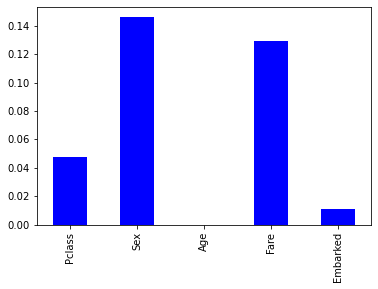

In [16]:
#  Plotting Information Gain values
importances=mutual_info_classif(X,y)
feat_importances=pd.Series(importances,index=X.columns)
feat_importances.plot(kind='bar',color='blue')
plt.show()

### Chi-square Test

- Used for categorical features in a dataset
- We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores
- The variables have to be categorical, sampled independently and values should have an expected frequency greater than 5.

- In its null hypothesis, it assumes that the given distributions are independent
- Higher the value of chi2, more is the importance of that feature, output is more dependent on this feature

Let the feature in question have 'm' attributes, the output have k class labels. Then the value of chi2 is given by the following expression:-

<img src='chi2.jpg'>

                                              O_ij – Observed frequency

                                              E_ij – Expected frequency

In [42]:
# OR simply
# chi2= ((observred freq- expected freq)**2) / Expected Frequency

### Chi2 implementaion using iris data

In [53]:
df=sns.load_dataset('iris')
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [54]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [55]:
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [56]:
y[0:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [57]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le=LabelEncoder()

In [58]:
y=le.fit_transform(y)

In [59]:
y[0:5]

array([0, 0, 0, 0, 0])

In [60]:
from sklearn.feature_selection import chi2, SelectKBest

In [61]:
chi2=SelectKBest(chi2, k=2)
X_kbest=chi2.fit_transform(X,y)

In [62]:
print(X.shape)
print(X_kbest.shape)

(150, 4)
(150, 2)


**No of features have been reduced from 4 to 2**

### Fisher’s Score

Returns the ranks of the variables based on the fisher’s score in descending order. We can then select the variables as per the case.

In [64]:
import seaborn as sns
import pandas as pd

In [65]:
df=sns.load_dataset('tips')

In [66]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [67]:
X=df.drop('tip',axis=1)
y=df.tip

In [68]:
# from sklearn.feature.function.similarity_based import fisher_score
# ranks=fisher_score.fisher_score(X,y)
# features=pd.Series(ranks,df.columns[0:len(df.columns)-1])
# features.plot(kind='bar',color='teal')
# plt.show()

### Correlation Coefficient

- The logic behind using correlation for feature selection is that the good variables are highly correlated with the target
- variables should be correlated with the target but should be uncorrelated among themselves.
- because if two variables are correlated we can predict one from another. So practically,only one of them is useful for model, the second one does not add any additional information to the model
- If we find that the predictor variables are correlated among themselves, we can drop the variable which has a lower correlation coefficient value with the target variable

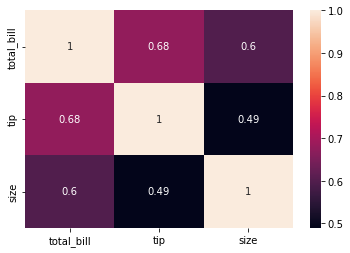

In [69]:
import seaborn as sns
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

### Variance Threshold

- It removes all features which variance doesn’t meet some threshold
- By default, it removes all zero-variance features, i.e., features that have the same value in all samples.
- We assume that features with a higher variance may contain more useful information
- it does not take target variable into account, it just checks variance of every input feature column & returns boolean value accordingly.

In [70]:
from sklearn.feature_selection import VarianceThreshold

In [74]:
# variance threshold need numerical features only, let see our data
X.head(2)

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3


In [ ]:
X=pd.get_dummies(X,drop_first=True)

> We don't need to separate categorical columns to pass into pd.get_dummies(), be defautl it automatically selects categorical columns and creates dummy varibles for them, and ignore numerical columns automatically.

In [79]:
X.dtypes

total_bill     float64
size             int64
sex_Female       uint8
smoker_No        uint8
day_Fri          uint8
day_Sat          uint8
day_Sun          uint8
time_Dinner      uint8
dtype: object

In [78]:
X.head(2)

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1


In [80]:
vt=VarianceThreshold(threshold=0)
vt.fit(X)
vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

> True means that the correspodning column does not have zero variance, we can always change the variance.

### Mean Absolute Difference??

- computes the absolute difference from the mean value.
- can be only used with numerical features, as it need to mathematical operations
- higher the MAD, higher the discriminatory power.

In [84]:
df=sns.load_dataset('iris')
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [85]:
x=df.drop('species',axis=1)

In [86]:
x.shape

(150, 4)

In [89]:
import numpy as np

<BarContainer object of 4 artists>

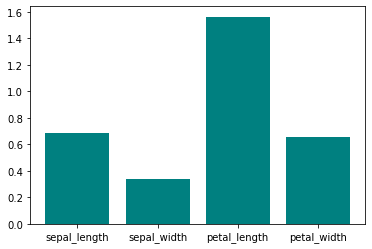

In [91]:
mad=np.sum(np.abs(x-x.mean(axis=0)),axis=0)/x.shape[0]
plt.bar(x.columns,mad,color='teal')

EX:

    Mean Absolute Error = (1/n) * ∑|yi – xi|
    yi: Actual value for the ith observation
    xi: Calculated value for the ith observation
    n: Total number of observations

In [92]:
# Python program for calculating Mean Absolute Error

# consider a list of integers for actual
actual = [2, 3, 5, 5, 9]
  
# consider a list of integers for calculated
calculated = [3, 3, 8, 7, 6]

n = 5
sum = 0

for i in range(n):
    sum += abs(actual[i] - calculated[i])
  
error = sum/n
print("Mean absolute error : " + str(error))

Mean absolute error : 1.8


In [93]:
# using sklearn mean absolute difference

from sklearn.metrics import mean_absolute_error as mae
error=mae(actual, calculated)
print(str(error))

1.8


### Dispersion Ratio

Ex:

    Dispersion ratio=arithmatic mean/geometric mean
    am=np.mean(X,axis=0)
    gm=np.power(np.prod(X,axis=0),1/X.shape[0])
    dratio=am/gm
    plt.bar(np.arange(X.shape[1],dratio,color='teal')

### Wrapper methods

#### 1.Forward Feature Selection

This is an iterative method wherein we start with the best performing variable against the target. Next, we select another variable that gives the best performance in combination with the first selected variable. This process continues until the preset criterion is achieved.

In [121]:
import seaborn as sns
df=sns.load_dataset('iris')
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [122]:
x=df.drop('species',axis=1)
y=df.species

We want the best 3 features, cv=0 means no cross-validation will occur, therefore, the performance (here: 'accuracy') is computed entirely on the training set
 
    from mlxtend.feature_selection import SequentialFeatureSelector as SFS
    ffs = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

    ffs = ffs.fit(X, y)

Take a look at the selected feature indices at each step:
      
    name = ('sepal length', 'sepal width', 'petal length', 'petal width')
    ffs = ffs.fit(X, y, feature_names=name)
    ffs.subsets_

Indices of the 3 best features is given by:

    ffs.k_feature_idx_
Names of features:

    ffs.k_feature_names_

In [125]:
# Finally, the prediction score for these 3 features can be accesses via k_score_:

ffs.k_score_

#### 2.Backward Feature Elimination

- starts with the entire set of features and works backward from there, removing features to find the optimal subset of a predefined size
- both FFS & BFS are potentially very computationally expensive, if u have a very large and multidimensional dataset its may not feasible or totally infeasible.
- Keep in mind that an optimized set of selected features using a given algorithm may or may not perform equally well with a different algorithm
- 

#### Sequential Backward Selection
    rfc=RandomForestClassifier(n_estimators=100)
    bfs= SFS(rfc, k_features=3, forward=False, floating=False, scoring='accuracy',cv=4,n_jobs=-1)
    bfs = bfs.fit(X, y)

    print(fbs.k_feature_idx_)
    print('CV Score:')
    print(fbs.k_score_)

#### Sequential Forward Floating Selection
    sffs = SFS(knn, k_features=3, forward=True,floating=True, scoring='accuracy',cv=4,n_jobs=-1)
    sffs = sffs.fit(X, y)

    print(sffs.k_feature_idx_)
    print('CV Score:')
    print(sffs.k_score_)

#### Sequential Backward Floating Selection
    sbfs = SFS(knn,k_features=3,forward=False, floating=True, scoring='accuracy',cv=4, n_jobs=-1)
    sbfs = sbfs.fit(X, y)
    print(sbfs.k_feature_idx_)
    CV Score:
    print(sbfs.k_score_)

    Selecting the best 3 features out of the 4 available features in the Iris set, we end up with similar results regardless of which sequential selection algorithms we used.

#### Visualizing the results in DataFrames:
    pd.DataFrame.from_dict(ffs.get_metric_dict()).T
Now, let's compare it to the Sequential Backward Selector:
      
     pd.DataFrame.from_dict(fbs.get_metric_dict()).T

#### Example 4 - Plotting the results

: 

    from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
    import matplotlib.pyplot as plt
    ffs = SFS(knn, 
          k_features=4, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          verbose=2,
          cv=5)

    ffs = ffs.fit(X, y)

    fig1 = plot_ffs(ffs.get_metric_dict(), kind='std_dev')

    plt.ylim([0.8, 1])
    plt.title('Sequential Forward Selection (w. StdDev)')
    plt.grid()
    plt.show()

#### Sequential Feature Selection for Regression

    from sklearn.linear_model import LinearRegression
    from sklearn.datasets import fetch_california_housing

    data = fetch_california_housing()
    X, y = data.data, data.target

    lr = LinearRegression()

    ffs = SFS(lr,k_features=8,forward=True, floating=False, scoring='neg_mean_squared_error',cv=10)

    ffs = ffs.fit(X, y)
    fig = plot_sfs(ffs.get_metric_dict(), kind='std_err')

    plt.title('Sequential Forward Selection (w. StdErr)')
    plt.grid()
    plt.show()

### Using the Selected Feature Subset For Making New Predictions

    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.datasets import load_iris

    iris = load_iris()
    X, y = iris.data, iris.
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

    knn = KNeighborsClassifier(n_neighbors=4)
    
    # Select the "best" three features using 5-fold cross-validation on the training set
    
    from mlxtend.feature_selection import SequentialFeatureSelector as SFS
    ffs = SFS(knn, k_features=3, forward=True, floating=False, scoring='accuracy',cv=5)
    ffs = ffs.fit(X_train, y_train)
    
    print('Selected features:', ffs.k_feature_idx_)
    
    # Generate the new subsets based on the selected features
    # Note that the transform call is equivalent to X_train[:, ffs.k_feature_idx_]
    
    X_train_ffs = ffs.transform(X_train)
    X_test_ffs = ffs.transform(X_test)

    # Fit the estimator using the new feature subset
    # and make a prediction on the test data
    knn.fit(X_train_ffs, y_train)
    y_pred = knn.predict(X_test_ffs)

    # Compute the accuracy of the prediction
    acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
    print('Test set accuracy: %.2f %%' % (acc * 100))